# Text classification with an RNN

## 텐서플로와 다른 라이브러리 임포트

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow.keras.datasets import imdb

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 런타임에서 할당하는데 필요한 양만큼의 GPU 메모리를 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

#### 데이터 로딩

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
print('훈련용 리뷰 개수 : {}'.format(len(x_train)))
print('테스트용 리뷰 개수 : {}'.format(len(x_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [5]:
x_train.shape

(25000,)

In [6]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


#### 리뷰의 통계정보 확인

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


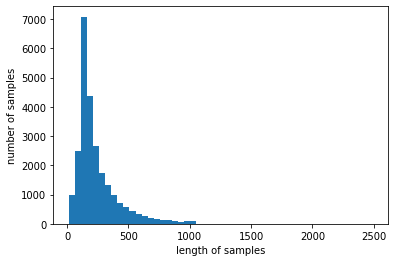

In [13]:
print('리뷰의 최대 길이 : {}'.format(max(len(l) for l in x_train)))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [15]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [16]:
word_to_index = imdb.get_word_index()
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key

1646592/1641221 [==============================] - 0s 0us/step


In [17]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 3941번 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 1번 단어 : the
빈도수 상위 3941번 단어 : journalist


In [18]:
print(' '.join([index_to_word[X] for X in x_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

### 모델 훈련 및 검증

#### 훈련을 위한 데이터 선택 및 전처리

In [19]:
TRAIN_VOCABULARY=5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=TRAIN_VOCABULARY)

In [20]:
max_time_steps=500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_time_steps)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_time_steps)

#### Q. 모델을 정의하시오.
* input_shape이나 input_length는 명시하지 않아도 됩니다.
* Dense Output Layer에서 Sigmoid activation을 포함해서 정의하시오.

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    embedding_dim = 120
    vocab =
    model = keras.model.Sequential([
        keras.layers.Embedding()
    ])
    return model

#### 모델 생성

In [ ]:
embedding_dim = 120
rnn_units = 120
BATCH_SIZE=64

model = build_model(
  vocab_size = TRAIN_VOCABULARY,
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

In [ ]:
model.summary()

#### 모델 훈련 설정

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy']) 

#### 모델 훈련

In [ ]:
EPOCHS = 10
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.1)

#### 모델 평가

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc)) 


In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
    
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### Q. 모델 테스트
샘플 리뷰에 대한 결과를 예측하시오. (Hint x_pred를 (1, None) 크기의 모델 입력으로 만드시오.)
* word_to_index를 사용해서 문자열을 숫자열로 변환
* tf.expand_dims 사용해서 1차원에서 2차원 Tensor로 변환 (1, None)

In [ ]:
def sample_predict(pred_text):
  list_of_words = tf.keras.preprocessing.text.text_to_word_sequence(
                    pred_text,
                    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                    lower=True,
                    split=' '
                )

  # list_of_words를 모델의 입력인 x_pred으로 변환
  # your code
  predictions = model.predict(x_pred)

  return (predictions)

In [ ]:
sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text)
print(predictions)